<a href="https://colab.research.google.com/github/Philocreation/Practice_Data_Cleaning/blob/main/20211222_movie_prediction%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# train data 읽기!!

In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [418]:
df = pd.read_csv("/content/drive/MyDrive/movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 결측치 처리

In [420]:
df.fillna(0, inplace=True)

# 카테고리 칼럼 인코딩



## distributor


In [421]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

# genre

In [422]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

##screening_rat

In [423]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [424]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,80,10,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,21,2,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,21,10,1
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,6,11,2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,96,11,1


In [425]:
df.drop(columns=["title","time", "release_time", "director"], inplace=True)

In [426]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,23398,80,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,6959083,21,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,217866,6,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,483387,96,11,1


#log 스케일 변환
dir_prev_bfnum  

num_staff       

box_off_num


In [427]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

#Standardization

In [428]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean()) / df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean()) / df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean()) / df.dir_prev_bfnum_log.std()
#df['box_off_num_log'] = (df.box_off_num_log  - df.box_off_num_log.mean()) / df.box_off_num_log.std()


## ONE-HOT 인코딩

In [429]:
df = pd.get_dummies(df, columns = ['distributor_code'])
df = pd.get_dummies(df, columns = ['genre_code'])
df = pd.get_dummies(df, columns = ['screening_rat_code'])

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 196 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(6), int64(2), uint8(185)
memory usage: 155.3 KB


# 불필요 컬럼 삭제

In [431]:
df.drop(columns=["distributor",
                 "genre",
                 "screening_rat",
                 "dir_prev_bfnum",
                 "num_staff"], inplace=True)

# x, y numpy로

In [432]:
y = df.box_off_num_log.to_numpy()
df.drop(columns=['box_off_num','box_off_num_log'], inplace=True)
x = df.to_numpy()

In [433]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


# train/test 나누기

In [434]:
i = int(len(x)*0.8)
train_x, test_x =x[:i],x[i:]
train_y, test_y =y[:i],y[i:]

# Template

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                1900      
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


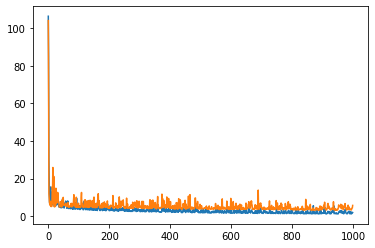

4/4 [==============================] - 0s 5ms/step - loss: 5.4948 - mape: 17.7729 - root_mean_squared_error: 2.3441
loss= 5.494760990142822
mape= 17.772911071777344
rmse= 2.344090700149536


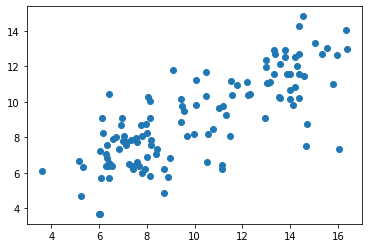

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape",RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

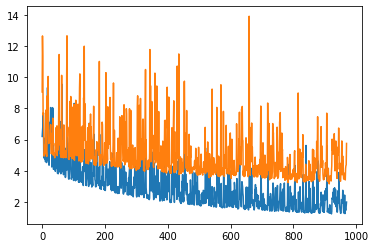

In [436]:
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.show()

In [437]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
r = rmse(predicted, test_y)
print(r)

tf.Tensor(334506.28, shape=(), dtype=float32)


# test data읽기!!

In [438]:
train_df = pd.read_csv("/content/drive/MyDrive/movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [439]:
test_df = pd.read_csv("/content/drive/MyDrive/movies_test.csv")
test_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [440]:
train_data_count = len(train_df)
test_data_count = len(df)

print(train_data_count)
print(test_data_count)

600
600


## train, test 합치고 더미 컬럼을 생성 

In [441]:
test_df["box_off_num"] = np.nan

In [442]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [443]:
test_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,NaN
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,NaN
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,NaN
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,NaN
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,NaN


In [444]:
df = pd.concat([train_df,test_df], axis = 0)
df 


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00,1,4,4,NaN
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00,1,68,7,NaN


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


# dummy_y 컬럼 추가

In [446]:
df['box_off_num'] = df.dir_prev_num

# 결측치 처리

In [447]:
df.fillna(0, inplace=True)

# 카테고리 칼럼 인코딩



## distributor


In [448]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

# genre

In [449]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

##screening_rat

In [450]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [451]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,0,97,10,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,2,27,2,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,4,27,10,1
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,2,7,11,2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,1,122,11,1


In [452]:
df.drop(columns=["title","time", "release_time", "director"], inplace=True)

In [453]:
df.head()

,distributor,genre,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,청소년 관람불가,0.00,0,91,2,0,97,10,3
1,(주)쇼박스,느와르,청소년 관람불가,1161602.50,2,387,3,2,27,2,3
2,(주)쇼박스,액션,15세 관람가,220775.25,4,343,4,4,27,10,1
3,(주)NEW,코미디,전체 관람가,23894.00,2,20,6,2,7,11,2
4,쇼박스(주)미디어플렉스,코미디,15세 관람가,1.00,1,251,2,1,122,11,1


#log 스케일 변환
dir_prev_bfnum  

num_staff       

box_off_num


In [454]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

#Standardization

In [455]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean()) / df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean()) / df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean()) / df.dir_prev_bfnum_log.std()
#df['box_off_num_log'] = (df.box_off_num_log  - df.box_off_num_log.mean()) / df.box_off_num_log.std()


## ONE-HOT 인코딩

In [456]:
df = pd.get_dummies(df, columns = ['distributor_code'])
df = pd.get_dummies(df, columns = ['genre_code'])
df = pd.get_dummies(df, columns = ['screening_rat_code'])

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 231 entries, distributor to screening_rat_code_3
dtypes: category(3), float64(6), int64(2), uint8(220)
memory usage: 255.9 KB


# 불필요 컬럼 삭제

In [458]:
df.drop(columns=["distributor",
                 "genre",
                 "screening_rat",
                 "dir_prev_bfnum",
                 "num_staff"], inplace=True)

In [459]:
print(df.head)

<bound method NDFrame.head of      dir_prev_num  num_actor  ...  screening_rat_code_2  screening_rat_code_3
0       -0.732131  -0.696309  ...                     0                     1
1        0.951870  -0.271878  ...                     0                     1
2        2.635872   0.152554  ...                     0                     0
3        0.951870   1.001416  ...                     1                     0
4        0.109870  -0.696309  ...                     0                     0
..            ...        ...  ...                   ...                   ...
238      0.109870   0.152554  ...                     0                     0
239     -0.732131  -0.696309  ...                     0                     0
240     -0.732131   0.152554  ...                     0                     1
241      0.109870   1.425847  ...                     0                     1
242     -0.732131   0.152554  ...                     0                     1

[843 rows x 226 columns]>


In [460]:
print(x.shape)
print(y.shape)

(600, 189)
(600,)


#전처리를 했으니 다시 train, test, subtest 나눈 다음 학습

In [461]:
train_df = df.iloc[:599,:]
test_df = df.iloc[600:,:]

In [462]:
print(train_df.shape)
print(test_df.shape)

(599, 226)
(243, 226)


In [472]:
y = train_df.to_numpy()
x = train_df.to_numpy()

In [473]:
i = int(len(x)*0.8)
train_x, test_x =x[:i],x[i:]
train_y, test_y =y[:i],y[i:]

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                2270      
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________


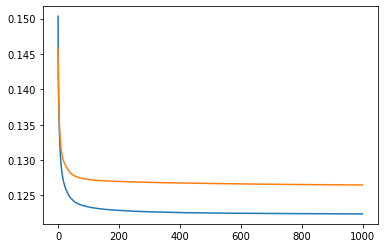

4/4 [==============================] - 0s 3ms/step - loss: 0.1236 - mape: 40535384.0000 - root_mean_squared_error: 0.3515
loss= 0.12356600910425186
mape= 40535384.0
rmse= 0.3515195846557617


ValueError: ignored

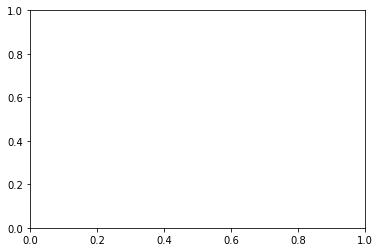

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(226,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape",RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print("rmse=", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

# 예측

In [476]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
r = rmse(predicted, test_y)
print(r)

tf.Tensor(1.0620213, shape=(), dtype=float32)
